In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Operações com os dados de todos os anos

#### Juntei os dados relacionados à licitação, licitantes e propostas já tratados nos outros notebooks de todos os anos com o comando: cat 2016/tipos_licitacoes_2016.txt 2017/tipos_licitacoes_2017.txt 2018/tipos_licitacoes_2018.txt 2019/tipos_licitacoes_2019.txt > tipos_licitacoes.txt

In [3]:
licitacoes=pd.read_csv('tipos_licitacoes.txt', sep = ',', low_memory=False)

In [4]:
print(licitacoes.columns.values)

['Unnamed: 0' 'CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO'
 'CD_TIPO_MODALIDADE' 'NR_PROCESSO' 'ANO_PROCESSO' 'TP_OBJETO'
 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'DS_OBJETO' 'VL_LICITACAO'
 'NR_DOCUMENTO' 'DT_PROPOSTA' 'VL_TOTAL_PROPOSTA' 'TP_RESULTADO_PROPOSTA']


In [5]:
licitacoes

,Unnamed: 0,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,0.0,86800,PM DE BOA VISTA DO SUL,4.0,2016,PRP,011,2016,COM,ADH,MPR,Aquisição de quadros (lousas) para as escolas ...,14875.92,8149396000145,2016-02-03,12720.0,C
1,1.0,47701,CM DE ESTRELA,1.0,2016,PRP,6762,2016,COM,ADH,MPR,Aquisição e instalação de um elevador tipo pla...,51085.0,90347840004539,2016-12-23,48000.0,C
2,2.0,47701,CM DE ESTRELA,1.0,2016,PRP,6762,2016,COM,ADH,MPR,Aquisição e instalação de um elevador tipo pla...,51085.0,20745692000104,2016-12-23,47900.0,C
3,3.0,77200,PM DE MATO LEITÃO,3.0,2016,PRP,014,2016,COM,ADH,MPR,compra de 1 motocicleta para o programa SUA NO...,7970.0,89908727000690,2016-02-01,7499.0,C
4,4.0,77200,PM DE MATO LEITÃO,10.0,2016,PRP,071,2016,COM,ADH,MPR,Compra de cerca e portão de PVC para o Muro da...,10000.0,8048278000140,2016-03-24,9500.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13693,4000.0,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,06161649000170,2019-05-13,30520.0,C
13694,4001.0,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,90355561000104,2019-05-13,27900.0,C
13695,4002.0,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,13745092000180,2019-05-13,43780.0,C
13696,4003.0,78200,PM DE NOVA SANTA RITA,2.0,2019,PRE,1590,2019,COM,HAP,MPR,Aquisição de Gás Medicinal Oxigênio com fornec...,60150.0,00331788003304,2019-03-15,60150.0,C


# Removendo a coluna Unnamed, que são os índices dos outros arqruivos

In [6]:
licitacoes = licitacoes.drop(licitacoes.columns[0], axis=1)

In [7]:
licitacoes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,86800,PM DE BOA VISTA DO SUL,4.0,2016,PRP,011,2016,COM,ADH,MPR,Aquisição de quadros (lousas) para as escolas ...,14875.92,8149396000145,2016-02-03,12720.0,C
1,47701,CM DE ESTRELA,1.0,2016,PRP,6762,2016,COM,ADH,MPR,Aquisição e instalação de um elevador tipo pla...,51085.0,90347840004539,2016-12-23,48000.0,C
2,47701,CM DE ESTRELA,1.0,2016,PRP,6762,2016,COM,ADH,MPR,Aquisição e instalação de um elevador tipo pla...,51085.0,20745692000104,2016-12-23,47900.0,C
3,77200,PM DE MATO LEITÃO,3.0,2016,PRP,014,2016,COM,ADH,MPR,compra de 1 motocicleta para o programa SUA NO...,7970.0,89908727000690,2016-02-01,7499.0,C
4,77200,PM DE MATO LEITÃO,10.0,2016,PRP,071,2016,COM,ADH,MPR,Compra de cerca e portão de PVC para o Muro da...,10000.0,8048278000140,2016-03-24,9500.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13693,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,06161649000170,2019-05-13,30520.0,C
13694,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,90355561000104,2019-05-13,27900.0,C
13695,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,13745092000180,2019-05-13,43780.0,C
13696,78200,PM DE NOVA SANTA RITA,2.0,2019,PRE,1590,2019,COM,HAP,MPR,Aquisição de Gás Medicinal Oxigênio com fornec...,60150.0,00331788003304,2019-03-15,60150.0,C


# Checando se há linhas duplicadas

In [8]:
print("Duplicated values: ", licitacoes.duplicated().sum())

Duplicated values:  2


In [9]:
duplicateRowsDF = licitacoes[licitacoes.duplicated()]
duplicateRowsDF

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
5758,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
9692,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA


# Ao concatenar o cabeçalho estava duplicado, aqui vou removê-los deixando apenas o primeiro

In [10]:
licitacoes.drop_duplicates(keep=False,inplace=True) 
licitacoes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,86800,PM DE BOA VISTA DO SUL,4.0,2016,PRP,011,2016,COM,ADH,MPR,Aquisição de quadros (lousas) para as escolas ...,14875.92,8149396000145,2016-02-03,12720.0,C
1,47701,CM DE ESTRELA,1.0,2016,PRP,6762,2016,COM,ADH,MPR,Aquisição e instalação de um elevador tipo pla...,51085.0,90347840004539,2016-12-23,48000.0,C
2,47701,CM DE ESTRELA,1.0,2016,PRP,6762,2016,COM,ADH,MPR,Aquisição e instalação de um elevador tipo pla...,51085.0,20745692000104,2016-12-23,47900.0,C
3,77200,PM DE MATO LEITÃO,3.0,2016,PRP,014,2016,COM,ADH,MPR,compra de 1 motocicleta para o programa SUA NO...,7970.0,89908727000690,2016-02-01,7499.0,C
4,77200,PM DE MATO LEITÃO,10.0,2016,PRP,071,2016,COM,ADH,MPR,Compra de cerca e portão de PVC para o Muro da...,10000.0,8048278000140,2016-03-24,9500.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13693,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,06161649000170,2019-05-13,30520.0,C
13694,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,90355561000104,2019-05-13,27900.0,C
13695,79800,PM DE SAGRADA FAMÍLIA,7.0,2019,PRP,17,2019,COM,ADH,MPR,Constitui objeto da presente licitação a contr...,102000.0,13745092000180,2019-05-13,43780.0,C
13696,78200,PM DE NOVA SANTA RITA,2.0,2019,PRE,1590,2019,COM,HAP,MPR,Aquisição de Gás Medicinal Oxigênio com fornec...,60150.0,00331788003304,2019-03-15,60150.0,C


# Convertendo as colunas de valores em float

In [12]:
licitacoes['VL_TOTAL_PROPOSTA'] = pd.to_numeric(licitacoes['VL_TOTAL_PROPOSTA'],errors='coerce')
licitacoes['VL_LICITACAO'] = pd.to_numeric(licitacoes['VL_LICITACAO'],errors='coerce')
licitacoes.dtypes

CD_ORGAO                  object
NM_ORGAO                  object
NR_LICITACAO              object
ANO_LICITACAO             object
CD_TIPO_MODALIDADE        object
NR_PROCESSO               object
ANO_PROCESSO              object
TP_OBJETO                 object
CD_TIPO_FASE_ATUAL        object
TP_LICITACAO              object
DS_OBJETO                 object
VL_LICITACAO             float64
NR_DOCUMENTO              object
DT_PROPOSTA               object
VL_TOTAL_PROPOSTA        float64
TP_RESULTADO_PROPOSTA     object
dtype: object

# Checando a estatística dos valores numéricos

In [13]:
licitacoes.describe()

,VL_LICITACAO,VL_TOTAL_PROPOSTA
count,1.369500e+04,1.369500e+04
mean,3.194720e+05,2.415875e+05
std,3.052485e+06,3.304177e+06
min,0.000000e+00,0.000000e+00
25%,1.373400e+04,6.763750e+03
50%,4.574890e+04,1.992000e+04
75%,1.499975e+05,6.700600e+04
max,3.138240e+08,3.486000e+08


# Checando quantos tipo de propostas perdedoras e vencedoras há

Text(0, 0.5, 'Tipo de resultado da proposta')

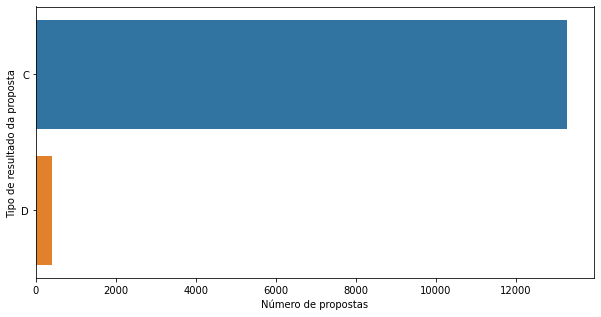

In [20]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))

sns.countplot(y=licitacoes.TP_RESULTADO_PROPOSTA ,data=licitacoes)
plt.xlabel("Número de propostas")
plt.ylabel("Tipo de resultado da proposta")

### Aqui podemos ver que as classes estão bem desbalanceadas

# One Hot Encoding

### Para transformar os objetos em valores numéricos

In [21]:
le = preprocessing.LabelEncoder()
for column in licitacoes.columns:
    if(licitacoes[column].dtypes=='object'):
        licitacoes[column] = le.fit_transform(licitacoes[column])
        
licitacoes.head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,397,148,320,0,7,109,2,0,0,1,2419,14875.92,4088,6,12720.0,0
1,75,39,0,0,7,1318,2,0,0,1,2647,51085.00,4437,196,48000.0,0
2,75,39,0,0,7,1318,2,0,0,1,2647,51085.00,2593,196,47900.0,0
3,337,280,254,0,7,116,2,0,0,1,4423,7970.00,4394,5,7499.0,0
4,337,280,1,0,7,182,2,0,0,1,2983,10000.00,4073,20,9500.0,0


# Removendo as colunas que possuem valores iguais em todas as instâncias

In [23]:
licitacoes = licitacoes.drop(['TP_OBJETO'], axis=1)

# Removendo os outliers através do z-score

In [33]:
from scipy import stats
df_sem_outliers = licitacoes[(np.abs(stats.zscore(licitacoes)) < 3).all(axis=1)]
df_sem_outliers

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,397,148,320,0,7,109,2,0,1,2419,14875.92,4088,6,12720.0,0
1,75,39,0,0,7,1318,2,0,1,2647,51085.00,4437,196,48000.0,0
2,75,39,0,0,7,1318,2,0,1,2647,51085.00,2593,196,47900.0,0
3,337,280,254,0,7,116,2,0,1,4423,7970.00,4394,5,7499.0,0
4,337,280,1,0,7,182,2,0,1,2983,10000.00,4073,20,9500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,149,102,90,3,6,696,5,0,1,1218,408699.92,2535,808,370130.0,0
13692,149,102,90,3,6,696,5,0,1,1218,408699.92,569,808,223000.0,0
13693,350,348,418,3,7,509,5,0,1,3067,102000.00,910,799,30520.0,0
13694,350,348,418,3,7,509,5,0,1,3067,102000.00,4438,799,27900.0,0


# Checando a correlação entre os atributos

In [34]:
corr = licitacoes.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
CD_ORGAO,1.000000,0.281760,-0.076116,-0.027081,-0.154674,0.076544,-0.026893,0.020406,0.051895,-0.207992,0.004819,0.031180,-0.030881,-0.017192,0.028792
NM_ORGAO,0.281760,1.000000,0.005408,-0.089800,-0.084663,-0.088047,-0.090152,-0.012075,0.087589,-0.039513,0.014051,0.012453,-0.091512,0.016422,-0.043954
NR_LICITACAO,-0.076116,0.005408,1.000000,-0.057793,0.157370,-0.026943,-0.057849,0.017389,-0.140936,0.060222,0.006938,-0.003100,-0.002285,0.006964,0.015205
ANO_LICITACAO,-0.027081,-0.089800,-0.057793,1.000000,0.047697,0.084366,0.999561,0.011309,0.177055,0.056474,0.004760,-0.148683,0.966107,0.012000,-0.001088
CD_TIPO_MODALIDADE,-0.154674,-0.084663,0.157370,0.047697,1.000000,-0.053675,0.047523,0.004069,-0.243646,0.152722,0.031643,-0.033595,0.066383,0.019424,-0.067288
NR_PROCESSO,0.076544,-0.088047,-0.026943,0.084366,-0.053675,1.000000,0.084965,0.035602,0.030076,-0.202410,-0.043710,0.004697,0.073142,-0.052476,-0.012972
ANO_PROCESSO,-0.026893,-0.090152,-0.057849,0.999561,0.047523,0.084965,1.000000,0.011362,0.176925,0.055762,0.004778,-0.149132,0.965634,0.011973,-0.000976
CD_TIPO_FASE_ATUAL,0.020406,-0.012075,0.017389,0.011309,0.004069,0.035602,0.011362,1.000000,-0.021829,-0.027527,0.000031,0.004317,0.006287,-0.004129,0.069387
TP_LICITACAO,0.051895,0.087589,-0.140936,0.177055,-0.243646,0.030076,0.176925,-0.021829,1.000000,-0.073731,-0.010521,0.041035,0.158802,-0.014338,-0.009655
DS_OBJETO,-0.207992,-0.039513,0.060222,0.056474,0.152722,-0.202410,0.055762,-0.027527,-0.073731,1.000000,0.050515,-0.003611,0.086367,0.048050,-0.005465


# Criando modelo de clasificação para saber se a proposta será perdedora ou vencedora

In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Separando os atributos dos rótulos

In [47]:
# Train test split
X = licitacoes.drop(['TP_RESULTADO_PROPOSTA'], axis = 1)
y = licitacoes['TP_RESULTADO_PROPOSTA']

# Criando os modelos de Aprendizagem de Máquina

In [48]:
# Support Vector Machines

def compute_svm(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Escalonamento de atributos porque não queremos uma variável independente dominando a outra, tornando os cálculos fáceis
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results(y_test, y_pred)

In [49]:
# K-Nearest Neighbor

def compute_knn(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Escalonamento de atributos porque não queremos uma variável independente dominando a outra, tornando os cálculos fáceis
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)


    neigh = KNeighborsClassifier()
    neigh.fit(X, y)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    results(y_test, y_pred)

In [50]:
# Artificial Neural Network

def compute_neural_network(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Escalonamento de atributos porque não queremos uma variável independente dominando a outra, tornando os cálculos fáceis
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    nn.fit(X, y)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)

    results(y_test, y_pred)

In [51]:
# Gradient Boosted Decision Trees

def compute_xgboost(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    xgboost_probs = xgboost.predict_proba(X_test)

    results(y_test,y_pred)

# Vi que as classes estão bem desbalanceadas, provavelmente os classificadores só acertarão a classe majoritária, aqui vou testar os métodos para comprovar minha teoria

In [53]:
compute_svm(X, y)

Confusion Matrix :
[[3986    0]
 [ 123    0]]
Accuracy: 97.01%
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3986
           1       0.00      0.00      0.00       123

    accuracy                           0.97      4109
   macro avg       0.49      0.50      0.49      4109
weighted avg       0.94      0.97      0.96      4109



In [54]:
compute_knn(X,y)

Confusion Matrix :
[[3975   11]
 [ 110   13]]
Accuracy: 97.06%
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3986
           1       0.54      0.11      0.18       123

    accuracy                           0.97      4109
   macro avg       0.76      0.55      0.58      4109
weighted avg       0.96      0.97      0.96      4109



In [55]:
compute_neural_network(X,y)

Confusion Matrix :
[[3978    8]
 [ 108   15]]
Accuracy: 97.18%
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3986
           1       0.65      0.12      0.21       123

    accuracy                           0.97      4109
   macro avg       0.81      0.56      0.60      4109
weighted avg       0.96      0.97      0.96      4109



In [56]:
compute_xgboost(X,y)

Confusion Matrix :
[[3958   28]
 [  66   57]]
Accuracy: 97.71%
Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3986
           1       0.67      0.46      0.55       123

    accuracy                           0.98      4109
   macro avg       0.83      0.73      0.77      4109
weighted avg       0.97      0.98      0.98      4109



# Apesar da acurácia ser alta (porque acerta muito a classe majoritária), pode-se ver que os algoritmos têm dificuldade em acertar a classe minoritária, então vou utilizar técnicas de sobreamostragem

### Como o xgboost apresentou melhor acurácia em relação ao teste anterior, vou utilizá-lo como classificador com as técnicas de sobreamostragem

In [57]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [58]:
# Train test split
X = licitacoes.drop(['TP_RESULTADO_PROPOSTA'], axis = 1)
y = licitacoes['TP_RESULTADO_PROPOSTA']

# Balanceamento de classes usando o método Naive random over-sampling (RandomOverSampler)

In [59]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_sample(X, y)

In [67]:
compute_xgboost(X_ros,y_ros)

Confusion Matrix :
[[3897   83]
 [   0 3998]]
Accuracy: 98.96%
Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3980
           1       0.98      1.00      0.99      3998

    accuracy                           0.99      7978
   macro avg       0.99      0.99      0.99      7978
weighted avg       0.99      0.99      0.99      7978



# Testando a Técnica de Sobreamostragem de Minoria Sintética (Synthetic Minority Oversampling Technique - SMOTE) para criar dados sintéticos

In [65]:
X_smote, y_smote = SMOTE(random_state = 0).fit_resample(X, y)

In [66]:
compute_xgboost(X_smote,y_smote)

Confusion Matrix :
[[3896   84]
 [  34 3964]]
Accuracy: 98.52%
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3980
           1       0.98      0.99      0.99      3998

    accuracy                           0.99      7978
   macro avg       0.99      0.99      0.99      7978
weighted avg       0.99      0.99      0.99      7978



# Testando o método sintético adaptável (Adaptive Synthetic - ADASYN) para criar dados sintéticos

In [70]:
X_ADASYN, y_ADASYN = ADASYN(random_state = 0).fit_resample(X, y)

In [71]:
compute_xgboost(X_ADASYN,y_ADASYN)

Confusion Matrix :
[[3878   98]
 [  31 3986]]
Accuracy: 98.39%
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3976
           1       0.98      0.99      0.98      4017

    accuracy                           0.98      7993
   macro avg       0.98      0.98      0.98      7993
weighted avg       0.98      0.98      0.98      7993



### Com isso, pode-se ver que com dados sintéticos o modelo aprendeu mais sobre a classe minoritária e, portanto, preveu melhor os dados, melhorando todos os resultados das métricas estatísticas. Portanto, é possível que se tivessemos mais dados sobre a classe minoritária e os dados fossem balanceados, poderíamos prever se a proposta seria perdedora ou ganhadora